# Prediction of New Covid Cases in Malaysia
1. Define the objective
2. Data Gathering
3. Data Cleaning
4. EDA
5. Feature Engineering & Selection
6. ModelBuilding
7. Conclusion


### Step 1 Define the objective

- Try to predict the rise or fall of covid cases as time moves onward

### Step 2 Data Gathering

- what type of data is needed to predict covid cases.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#Load data and show first 5 records
#This dataset loads until the 4th of march 2022
df = pd.read_csv('D:/Datasets/owid-covid-data.csv')
pd.set_option('Display.max_columns', 67)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
#Show the size of the dataset
df.shape

(166098, 67)

#### Observation:

- Our data set has 67 columns/features and 166098 rows/records. (68 with the days column that will be added later)
- The data that we have include all countries which will be filtered down to only Malaysia later



### Step 3 Data Cleaning - Check


In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


##### Filtering the dataset to only contain Malaysia cases

In [5]:
#Extracting the data where "iso_code" is equal to "MYS" (Malaysia)
df = df.loc[df['iso_code'] == "MYS"].reset_index(drop = True).rename_axis('days').reset_index(drop = False)
df.head()

,days,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,0,MYS,Asia,Malaysia,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,32776195.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,NaN,NaN,NaN,NaN
1,1,MYS,Asia,Malaysia,2020-01-25,4.0,4.0,NaN,NaN,NaN,NaN,0.122,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,32776195.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,NaN,NaN,NaN,NaN
2,2,MYS,Asia,Malaysia,2020-01-26,4.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,21.0,0.001,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,32776195.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,NaN,NaN,NaN,NaN
3,3,MYS,Asia,Malaysia,2020-01-27,4.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,45.0,0.001,0.001,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,32776195.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,NaN,NaN,NaN,NaN
4,4,MYS,Asia,Malaysia,2020-01-28,4.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,98.0,0.003,0.002,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,32776195.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,NaN,NaN,NaN,NaN


### Identifying and removing duplicate features

- "new_cases", "new_cases_smoothed", "new_cases_per_million", and "new_cases_smoothed_per_million" represent the same data but displayed differently.

- "new_deaths", "new_deaths_smoothed", "new_deaths_per_million", and "new_deaths_smoothed_per_million" represent the same data but displayed differently.

- "new_tests", "new_tests_smoothed", "new_tests_per_thousand", and "new_tests_smoothed_per_thousand" represent the same data but displayed differently.

- "new_vaccinations", "new_vaccincations_smoothed", "new_vaccinations_smoothed_per_million" represent the same data but displayed differently.

- "total_cases", "total_cases_per_million" represent the same data but displayed differently.

- "total_deaths", "total_deaths_per_million" represent the same data but displayed differently.

- "total_vaccinations", "total_vaccinations_per_hundred" represent the same data but displayed differently.

- "people_vaccinated", "people_vaccinated_smoothed", "people_vaccinated_per_hundred" represent the same data but displayed differently.

- "people_fully_vaccinated", "people_fully_vaccinated_per_hundred" represent the same data but displayed differently.

- "total_boosters", "total_boosters_per_hundred" represent the same data but displayed differently.

- "new_people_vaccinated_smoothed", "new_people_vaccinated_smoothed_per_hundred" represent the same data but displayed differently.

- "total_tests", "total_tests_per_thousand" represent the same data but displayed differently.

### Identifying and removing useless features

- "continent", "location", and "iso_code" are useless features as we already filtered the data to only have Malaysian data.

- "date" is a useless feature as we are using the index to represent the number of days that passed.

- "gdp_per_capita", "extreme_poverty", "median_age", "aged_65_older", "aged_70_older", "cardiovasc_death_rate", "diabetes_prevalence", "female_smokers", "male_smokers", "handwashing_facilities", "hospital_beds_per_thousand", "life_expectancy", "human_development_index", "reproduction_rate", "icu_patients", "icu_patients_per_million", "hosp_patients", "hosp_patients_per_million", "weekly_icu_admissions", "weekly_icu_admissions_per_million", "weekly_hosp_admissions", "weekly_hosp_admissions_per_million", "tests_units", "stringency_index", "excess_mortality_cumulative", "excess_mortality", "excess_mortality_cumulative_absolute", "excess_mortality_cumulative_per_million", "population", "population_density" are useless features as it provides nothing for our use case. 


In [6]:
df.drop(['excess_mortality', 'new_vaccinations_smoothed_per_million', 'total_tests_per_thousand', 'new_people_vaccinated_smoothed_per_hundred', 'total_boosters_per_hundred', 'people_fully_vaccinated_per_hundred', 'people_vaccinated_per_hundred', 'total_vaccinations_per_hundred', 'total_deaths_per_million', 'total_cases_per_million', 'location', 'new_cases_smoothed', 'new_cases_smoothed_per_million', 'new_cases_per_million' , 'new_deaths_smoothed', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'new_tests_smoothed', 'new_tests_per_thousand', 'new_tests_smoothed_per_thousand', 'new_vaccinations_smoothed', "gdp_per_capita", "extreme_poverty", "median_age", "aged_65_older", "aged_70_older", "cardiovasc_death_rate", "diabetes_prevalence", "female_smokers", "male_smokers", "handwashing_facilities", "hospital_beds_per_thousand", "life_expectancy", "human_development_index", 'date', 'continent', "reproduction_rate", "icu_patients", "icu_patients_per_million", "hosp_patients", "hosp_patients_per_million", "weekly_icu_admissions", "weekly_icu_admissions_per_million", "weekly_hosp_admissions", "weekly_hosp_admissions_per_million", "tests_units", "stringency_index", "excess_mortality_cumulative", "excess_mortality_cumulative_absolute", "excess_mortality_cumulative_per_million", 'iso_code', 'population', 'population_density'], axis = 1, inplace = True)
df.head()

,days,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_people_vaccinated_smoothed
0,0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4.0,4.0,NaN,NaN,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4.0,0.0,NaN,NaN,14.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4.0,0.0,NaN,NaN,24.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.0,0.0,NaN,NaN,53.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(771, 15)

#### Observations:

- 19 columns have been removed due to duplicate information.
- 33 columns have been removed due to being useless in our use case.
- A total of 42 columns have been removed from the dataset.

### Identifying Numerical and Catagorical Features

In [8]:
df.dtypes

days                                int64
total_cases                       float64
new_cases                         float64
total_deaths                      float64
new_deaths                        float64
new_tests                         float64
total_tests                       float64
positive_rate                     float64
tests_per_case                    float64
total_vaccinations                float64
people_vaccinated                 float64
people_fully_vaccinated           float64
total_boosters                    float64
new_vaccinations                  float64
new_people_vaccinated_smoothed    float64
dtype: object

#### Observations:

1. All 15 features are numerical.

2. The following are numerical features:
    - days, total_cases, new_cases, total_deaths, new_deaths, new_tests, total_tests, positive_rate, tests_per_case, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed

### Step 4 EDA

In [9]:
#Check wich features are dependant and which are independant
df.head()

,days,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_people_vaccinated_smoothed
0,0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4.0,4.0,NaN,NaN,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4.0,0.0,NaN,NaN,14.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4.0,0.0,NaN,NaN,24.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.0,0.0,NaN,NaN,53.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations:

- The "new_cases" feature represents the increase of cases in Malaysia making it our Dependent feature.

- The rest of the features are independent features.

In [10]:
#Check the datatype of our dependent feature to know if it is catagorical or numerical
df['new_cases'].dtype

dtype('float64')

#### Observations:

- The "new_cases" feature is of the float64 datatype meaning that it is a numerical feature.

### Types Of Missing Data

In [11]:
nan_col = df.columns[df.isnull().any()]
for i in nan_col:
    print(i, df[i].isnull().sum())

total_cases 1
new_cases 1
total_deaths 53
new_deaths 53
new_tests 3
total_tests 3
positive_rate 10
tests_per_case 15
total_vaccinations 398
people_vaccinated 398
people_fully_vaccinated 398
total_boosters 587
new_vaccinations 399
new_people_vaccinated_smoothed 399


#### Observations:

1. In the "total_cases" and "new_cases" column, there are 1 missing values.
2. In the "new_tests" and "total_tests" column, there are 3 missing values.
3. In the "postive_rate" column, there are 10 missing values.
4. In the "tests_per_case" column, there are 15 missing values.
5. In the "total_deaths" and "new_deaths" column, there are 53 missing values.
6. In the "total_vaccinations", "people_vaccinated", and "people_fully_vaccinated" column, there are 398 missing values.
7. In the "new_vaccinations" and "new_people_vaccinated_smoothed" column, there are 399 missing values.
8. In the "total_boosters" column, there are 587 missing values.

### Discover which missing data mechanism matches the missing data in the "total_cases" and "new_cases" column

In [12]:
msng_df = df[['days', 'new_cases', 'total_cases']]
msng_df[msng_df['new_cases'].isnull()]

,days,new_cases,total_cases
0,0,NaN,NaN


#### Observations 1:
we know that the missing data for "total_cases" and "new_cases" is only on row 0 because we know there is only one missing data. We can surmize that the missing data is due to the cases not being collected on the very first day of the pandemix so the data did not exist.

We can conclude that the presence of missing values in the "total_cases" and "new_cases" columns is because the data did not exist, and the data didn't exist because the pandemic had just started.

Therefore, we can say that these missing values follow the MNAR (Missing Not At Random) mechanism.

### Discover which missing data mechanism matches the missing data in the "new_tests" and "total_tests" column

In [13]:
msng_df = df[['days', 'new_tests', 'total_tests']]
msng_df[msng_df['new_tests'].isnull()]

,days,new_tests,total_tests
768,768,NaN,NaN
769,769,NaN,NaN
770,770,NaN,NaN


#### Observations 2:
Due to the fact that the data is missing at the end of the dataframe makes us think that the dataprovider did not recieve the data before distributing it to us.

We can conclude that the presence of missing values in the "new_tests" and "total_tests" columns is because the data did not exist yet.

Therefore, we can say that these missing values follow the MNAR (Missing Not At Random) mechanism.

### Discover which missing data mechanism matches the missing data in the "positive_rate" column

In [14]:
msng_df = df[['days', 'positive_rate']]
msng_df[msng_df['positive_rate'].isnull()]

,days,positive_rate
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,NaN
768,768,NaN
769,769,NaN
770,770,NaN


#### Observations 3:
The data missing can be observed in 2 ways, one way for the beginning and another for the end of the dataset:
- In the beginning of the pandemic, covid tests took around a week or so to give a result. Since tests started at day 0, that means that the results would be released on day 7 which takes place 7 days after the first test.

- The data missing at the end however may be the same case as the previous observation which says that the dataprovider did not recieve the data before distributing it to us.

We can conclude that the presence of missing values in the "positive_rate" column is because the data did not exist yet.

Therefore, we can say that these missing values follow the MNAR (Missing Not At Random) mechanism.

### Discover which missing data mechanism matches the missing data in the "tests_per_case" and "positive_rate" column

In [15]:
msng_df = df[['days', 'positive_rate','tests_per_case']]
msng_df[msng_df['tests_per_case'].isnull()]

,days,positive_rate,tests_per_case
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,NaN
4,4,NaN,NaN
5,5,NaN,NaN
6,6,NaN,NaN
29,29,0.0,NaN
30,30,0.0,NaN
31,31,0.0,NaN


#### Observations 4:
The data missing can be observed in 3 ways, one way for the beginning, another for the middle, and another for the end of the dataset:
- In the beginning of the pandemic, like the previous observation, covid tests took around a week or so to give a result. Since tests started at day 0, that means that the results would be released on day 7 which takes place 7 days after the first test.

- The data missing at the middle of the datafram is missing due to the positive rate being equal to zero.

- The data missing at the end however may be the same case as observation 2 which says that the dataprovider did not recieve the data before distributing it to us.

We can conclude that the presence of missing values in the "positive_rate" column is because the data was not delivered by the data provider.

Therefore, we can say that these missing values follow the MNAR (Missing Not At Random) mechanism.

### Discover which missing data mechanism matches the missing data in the "new_deaths" and "total_deaths" column

In [16]:
msng_df = df[['days', 'total_deaths','new_deaths']]
msng_df[msng_df['total_deaths'].isnull()]

,days,total_deaths,new_deaths
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,NaN
4,4,NaN,NaN
5,5,NaN,NaN
6,6,NaN,NaN
7,7,NaN,NaN
8,8,NaN,NaN
9,9,NaN,NaN


#### Observations 5:
The missing data for "total_deaths" and "new_deaths" in at the very beginning which we can surmize as the fact that people that died from covid were either not recorded yet or have only started dying on days 53 and onwards. 

We can conclude that the presence of missing values in the "total_deaths" and "new_deaths" columns is because the data did not exist, and the data didn't exist because the pandemic had just started.

Therefore, we can say that these missing values follow the MNAR (Missing Not At Random) mechanism.

### Discover which missing data mechanism matches the missing data in the "total_vaccinations" and "people_vaccinated", and "people_fully_vaccinated" columns

In [17]:
msng_df = df[['days', 'total_vaccinations','people_vaccinated', 'people_fully_vaccinated']]
msng_df[msng_df['total_vaccinations'].isnull()]

,days,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,0,NaN,NaN,NaN
1,1,NaN,NaN,NaN
2,2,NaN,NaN,NaN
3,3,NaN,NaN,NaN
4,4,NaN,NaN,NaN
...,...,...,...,...
393,393,NaN,NaN,NaN
394,394,NaN,NaN,NaN
395,395,NaN,NaN,NaN
396,396,NaN,NaN,NaN


#### Observations 6:
The data missing can be observed in 2 ways, one way for the beginning and another for the end of the dataset:
- The vaccine for covid was first developed almost 1 year after covid was declared a pandemic therefore the missing data at the beginning is justified.

- The 1 missing data at the end however may be the same case as observation 2 which says that the dataprovider did not recieve the data before distributing it to us.

We can conclude that the presence of missing values in the "total_vaccination", "people_vaccinated", and "people_fully_vaccinated" columns is because the data did not exist yet.

Therefore, we can say that these missing values follow the MNAR (Missing Not At Random) mechanism.

### Discover which missing data mechanism matches the missing data in the "new_vaccinations" and "new_people_vaccinated_smoothed" columns 

In [18]:
msng_df = df[['days', 'new_people_vaccinated_smoothed','new_vaccinations']]
msng_df[msng_df['new_vaccinations'].isnull()]

,days,new_people_vaccinated_smoothed,new_vaccinations
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,NaN
4,4,NaN,NaN
...,...,...,...
394,394,NaN,NaN
395,395,NaN,NaN
396,396,NaN,NaN
397,397,NaN,NaN


#### Observations 7:
The data missing can be observed in 2 ways, same as the previous observation, one way for the beginning and another for the end of the dataset:
- The vaccine for covid was first developed almost 1 year after covid was declared a pandemic therefore the missing data at the beginning is justified.

- The 1 missing data at the end however may be the same case as observation 2 which says that the dataprovider did not recieve the data before distributing it to us.

We can conclude that the presence of missing values in the "new_vaccinations", and "new_people_vaccinated_smoothed" columns is because the data did not exist yet.

Therefore, we can say that these missing values follow the MNAR (Missing Not At Random) mechanism.

### Discover which missing data mechanism matches the missing data in the "total_boosters" columns 

In [19]:
msng_df = df[['days', 'total_boosters']]
msng_df[msng_df['total_boosters'].isnull()]

,days,total_boosters
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
582,582,NaN
583,583,NaN
584,584,NaN
585,585,NaN


#### Observations 8:
The data missing can be observed in 2 ways, same as the previous observation, one way for the beginning and another for the end of the dataset:
- Using booster doses was started near the end of last year which justified the total boosters at the beginning not having a value

- The 1 missing data at the end however may be the same case as observation 2 which says that the dataprovider did not recieve the data before distributing it to us.

We can conclude that the presence of missing values in the "total_boosters" column is because the data did not exist yet.

Therefore, we can say that these missing values follow the MNAR (Missing Not At Random) mechanism.

### Step 5 Feature Engineering & Selection 

<AxesSubplot:>

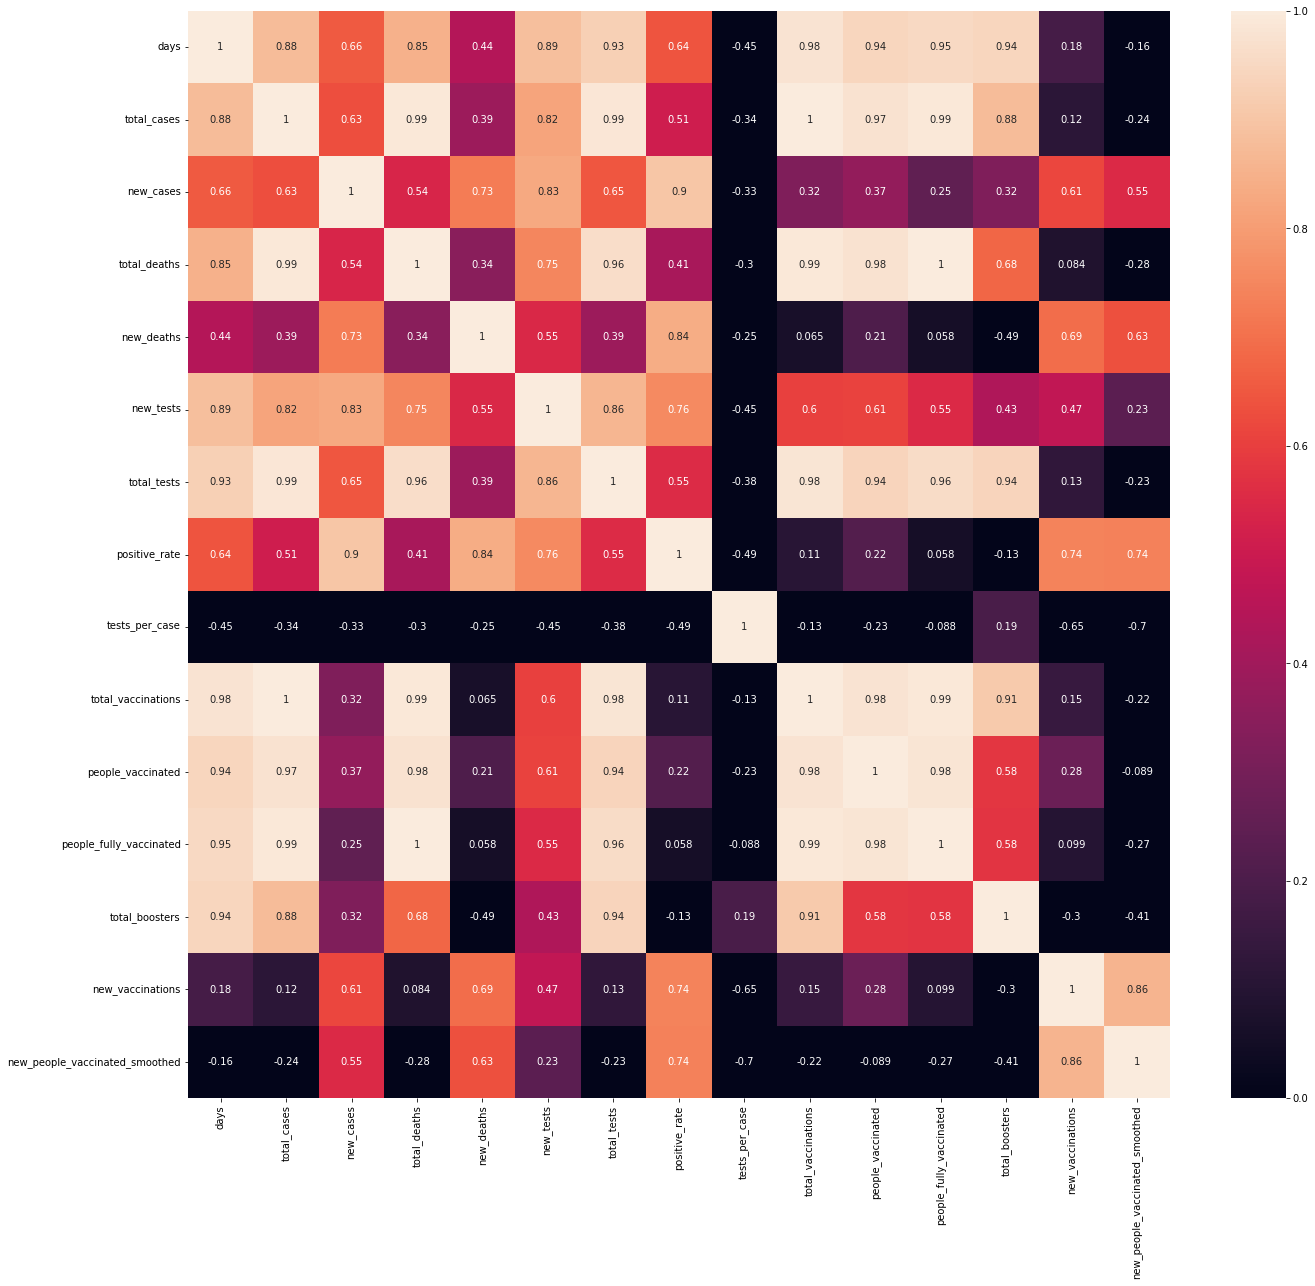

In [20]:
# Part 5 Feature Engineering
# To select the best features for our model we will be using the correlation matrix with Heatmap
# We will use correlation matrix to determine the relation between the independent and dependent features
# Variables with high correlation should not be paired together
plt.figure(figsize=(22, 20))
sn.heatmap(df.corr(), annot=True, vmin=0, vmax=1)

### Step 6 Model Building

Accuracy:44.835 %


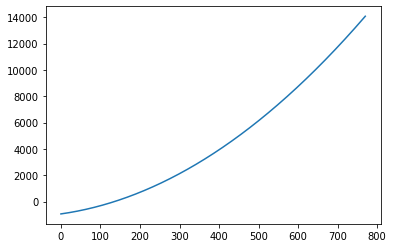

Prediction - Cases after 1 day :[[14113.51779689]]


In [37]:
df['new_cases'].fillna(value=0,inplace=True)

x = np.array(df['days']+1).reshape(-1, 1)
y = np.array(df['new_cases']).reshape(-1, 1)

# Divided into training sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

polyFeature = PolynomialFeatures(degree=2)
x = polyFeature.fit_transform(x)
model = linear_model.LinearRegression()
model.fit(x, y)
accuracy = model.score(x, y)
print(f'Accuracy:{round(accuracy*100,3)} %')
y0 = model.predict(x)
plt.plot(y0)
plt.show()

days = 1
print(f'Prediction - Cases after {days} day :', end='')
pre = model.predict(polyFeature.fit_transform([[(771+days)]]))
print(pre)

#### Observation:
We have used a linear regression model to plot our predictions however the accuracy stands at 44.835% and the prediction is 14113 new cases on the 5th of March. (The actual result is 33406 new cases which means our prediction was off by more than 19 thousand cases) when the polynomial degree is 2. In the next part we will atempt to use polynomial degrees 3 till 10 and display the best result in our opinions.

Accuracy:85.053 %


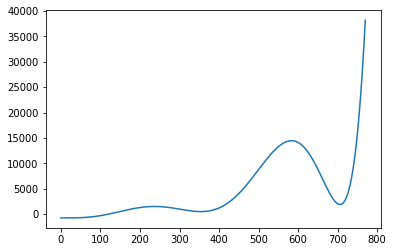

Prediction - Cases after 1 day :[[39709.59987407]]


In [40]:
df['new_cases'].fillna(value=0,inplace=True)

x = np.array(df['days']+1).reshape(-1, 1)
y = np.array(df['new_cases']).reshape(-1, 1)

# Divided into training sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

polyFeature = PolynomialFeatures(degree=8)
x = polyFeature.fit_transform(x)
model = linear_model.LinearRegression()
model.fit(x, y)
accuracy = model.score(x, y)
print(f'Accuracy:{round(accuracy*100,3)} %')
y0 = model.predict(x)
plt.plot(y0)
plt.show()

days = 1
print(f'Prediction - Cases after {days} day :', end='')
pre = model.predict(polyFeature.fit_transform([[(771+days)]]))
print(pre)

#### Observation:
Using a polynomial degree of 8 has given us the best result which is 85.053% with a prediction of 39709 on the 5th of March (The actual result is 33406 new cases which means our prediction was off by more than 6 thousand cases)

### Step 7 Conclusion
In conclusion, We imported a database around daily covid statistics. After cleaning it for our own use, we performed a linear regression on it, Which initially gave us a result of 44.835% when we used a degree of 2. When we tested all degrees from 3 to 10, we found that a degree of 8 is best according to its accuracy and its resulting prediction. However, the values we achieve here no matter what will never be able to predict how covid cases increase, that is probably due to the nature of how infections work and the many variable senarios and conditions in which covid can spread.